# Genetic Algorithm 
Reference : https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random, operator, time

In [2]:
#City class 구성
class City :
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def distance(self,city):
        Dis = np.sqrt((self.x-city.x)**2+(self.y-city.y)**2)
        return Dis
    
    def __repr__(self):
        return '('+str(self.x)+','+str(self.y)+')'
    

In [3]:
city1 = City(3,5)

In [4]:
city1

(3,5)

In [5]:
city2 = City(5,7)

In [6]:
city1.distance(city2)

2.8284271247461903

In [7]:
#Fitness
class Fitness :
    def __init__(self,route):
        self.route = route
        self.distance =0
        self.fitness = 0
        
        
        
    def routeDistance(self):
        pathdistance = 0
        if self.distance == 0:
            for i in range(0,len(self.route)):
                if i+1 < len(self.route):
                    fromCity = self.route[i]
                    toCity = self.route[i+1]
                    pathdistance += fromCity.distance(toCity)
                else :
                    fromCity = self.route[len(self.route)-1]
                    toCity = self.route[0]
                    pathdistance += fromCity.distance(toCity)
        return pathdistance
    
    def routeFitness(self):
        routefitness = 0
        routedistance = self.routeDistance()
        if self.fitness==0:
            routefitness = 1/float(routedistance)
            
        return routefitness
              

In [8]:
route1 = []
route1.append(city1)
route1.append(city2)

In [9]:
route1

[(3,5), (5,7)]

In [10]:
fitness1 = Fitness(route1).routeFitness()

In [11]:
fitness1

0.17677669529663687

In [12]:
#createRoute : CityList에서 구성된 랜덤샘플로 route구성
def createRoute(cityList):
    route = random.sample(cityList,len(cityList))
    return route

In [13]:
route1

[(3,5), (5,7)]

In [14]:
citylist1 = route1

In [15]:
route1.append(City(8,8))

In [16]:
route1.append(City(9,1))

In [17]:
route1

[(3,5), (5,7), (8,8), (9,1)]

In [18]:
citylist1=route1

In [19]:
citylist1

[(3,5), (5,7), (8,8), (9,1)]

In [20]:
createRoute(citylist1)

[(3,5), (5,7), (8,8), (9,1)]

In [21]:
#cityList,popNum입력받아 popNum개의 population 형성
def initialPopulation(cityList,popNum):
    population = []
    for i in range(popNum):
        population.append(createRoute(cityList))
    return population

In [22]:
a = initialPopulation(citylist1,10)

In [23]:
a

[[(3,5), (8,8), (5,7), (9,1)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(9,1), (3,5), (8,8), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (3,5), (5,7), (9,1)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(5,7), (3,5), (8,8), (9,1)],
 [(5,7), (3,5), (9,1), (8,8)]]

In [24]:
a

[[(3,5), (8,8), (5,7), (9,1)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(9,1), (3,5), (8,8), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (3,5), (5,7), (9,1)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(5,7), (3,5), (8,8), (9,1)],
 [(5,7), (3,5), (9,1), (8,8)]]

In [25]:
poprank = {}
for i in range(len(a)):
    fitness = Fitness(a[i]).routeFitness()
    poprank[i]=fitness



In [26]:
poprank

{0: 0.04270687325065816,
 1: 0.04270687325065816,
 2: 0.04270687325065817,
 3: 0.043589035044329795,
 4: 0.043589035044329795,
 5: 0.043589035044329795,
 6: 0.04932699445510354,
 7: 0.043589035044329795,
 8: 0.043589035044329795,
 9: 0.049326994455103544}

In [27]:

routerank = sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [28]:
routerank

[(9, 0.049326994455103544),
 (6, 0.04932699445510354),
 (3, 0.043589035044329795),
 (4, 0.043589035044329795),
 (5, 0.043589035044329795),
 (7, 0.043589035044329795),
 (8, 0.043589035044329795),
 (2, 0.04270687325065817),
 (0, 0.04270687325065816),
 (1, 0.04270687325065816)]

In [29]:
#rankRoutes로 population의 route중 fitness좋은것부터
#순서대로 (index,fitness)형태로 출력
def rankRoutes(population):
    poprank = {}
    for i in range(len(population)):
        fitness = Fitness(population[i]).routeFitness()
        poprank[i]=fitness
    return sorted(poprank.items(),key = operator.itemgetter(1),reverse=True)


In [30]:
b=rankRoutes(a)

In [31]:
b

[(9, 0.049326994455103544),
 (6, 0.04932699445510354),
 (3, 0.043589035044329795),
 (4, 0.043589035044329795),
 (5, 0.043589035044329795),
 (7, 0.043589035044329795),
 (8, 0.043589035044329795),
 (2, 0.04270687325065817),
 (0, 0.04270687325065816),
 (1, 0.04270687325065816)]

In [32]:
c=random.sample(b,4)

In [33]:
c

[(8, 0.043589035044329795),
 (9, 0.049326994455103544),
 (6, 0.04932699445510354),
 (2, 0.04270687325065817)]

In [34]:
df = pd.DataFrame(c,columns=['Index','Fitness'])

In [35]:
df

,Index,Fitness
0,8,0.043589
1,9,0.049327
2,6,0.049327
3,2,0.042707


In [40]:
df.loc[df['Fitness'].idxmax(),'Index']

9

In [41]:
#tournament selection. population length만큼 선택하기.
def selection(popRank,tour_size):
    selected = []

    for i in range(len(popRank)):
        select = random.sample(popRank,tour_size)
        df = pd.DataFrame(select,columns=['Index','Fitness'])
        selected.append(df.loc[df['Fitness'].idxmax()])
    return selected
                
        
    

In [42]:
selc = selection(b,4)

In [48]:
selc[1]

Index      9.000000
Fitness    0.049327
Name: 0, dtype: float64

In [49]:
#selection 결과 바탕으로 matingpool형성
def matingpool(selected,population):
    #population에서 tournament로 selected된 route들로 mating pool 형성
    index = []
    for i in range(len(selected)):
        index.append(int(selected[i][0]))
    pool = []
    for i in range(len(index)):
        pool.append(population[index[i]])
    return pool    
    
    
           

In [50]:
matingpool(selc,a)

[[(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (3,5), (5,7)]]

In [51]:
a

[[(3,5), (8,8), (5,7), (9,1)],
 [(9,1), (5,7), (8,8), (3,5)],
 [(9,1), (3,5), (8,8), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(8,8), (3,5), (5,7), (9,1)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(5,7), (3,5), (8,8), (9,1)],
 [(5,7), (3,5), (9,1), (8,8)]]

In [52]:
#breed...
parent1 = random.sample(a,1)
parent2 = random.sample(a,1)
abs1 = random.randint(0,len(parent1[0]))
abs2 = random.randint(0,len(parent2[0]))
child1 =[]
for i in range(min(abs1,abs2),max(abs1,abs2)):
    child1.append(parent1[0][i])
child2 = [val for val in parent2[0] if val not in child1]
Child = child1+child2

In [53]:
child1

[(3,5), (8,8)]

In [54]:
parent2

[[(9,1), (3,5), (8,8), (5,7)]]

In [55]:
child2

[(9,1), (5,7)]

In [56]:
parent1

[[(9,1), (5,7), (3,5), (8,8)]]

In [57]:
def breed(parent1,parent2):
    child1 = []
    abs1 = random.randint(0,len(parent1))
    abs2 = random.randint(0,len(parent2))
    child1 = []
    for i in range(min(abs1,abs2),max(abs1,abs2)):
        child1.append(parent1[i])
    child2 = [val for val in parent2 if val not in child1]
    Child = child1+child2
    return Child

In [58]:
pool = matingpool(selc,a)

In [59]:
pool

[[(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (3,5), (5,7)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (3,5), (5,7)]]

In [60]:
pool[1]

[(5,7), (3,5), (9,1), (8,8)]

In [61]:
random.randint(0,3)

3

In [62]:
def breedpopulation(pool):
    breedpop = []
    for i in range(len(pool)):
        parent1 = pool[int(random.random()*len(pool))]
        parent2 = pool[int(random.random()*len(pool))]
        breedpop.append(breed(parent1,parent2))
    return breedpop
#pool에서 랜덤한 부모 2명 추출-> breed
#pool length(=popnum)만큼 breedpopulation(자손pop)생성

In [63]:
brpop = breedpopulation(pool)

In [64]:
def mutate(breedroute):
    index1 = int(random.random()*len(breedroute))
    index2 = int(random.random()*len(breedroute))
    change1 = breedroute[index1]
    change2 = breedroute[index2]
    breedroute[index1] = change2
    breedroute[index2] = change1
    return breedroute
            
        
    

In [65]:
def mutatepopulation(breedpop,mutationrate):
    for i in range(len(breedpop)):
        rate = random.random()
        if rate < mutationrate:
            mutate(breedpop[i])
        
    return breedpop

In [66]:
brpop

[[(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (5,7), (3,5)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (3,5), (5,7), (8,8)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (9,1), (3,5), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)]]

In [67]:
mutatepopulation(brpop,0.3)

[[(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (5,7), (3,5)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (3,5), (5,7), (8,8)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (9,1), (3,5), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)]]

In [68]:
brpop

[[(5,7), (3,5), (9,1), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)],
 [(8,8), (9,1), (5,7), (3,5)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (3,5), (5,7), (8,8)],
 [(9,1), (5,7), (3,5), (8,8)],
 [(9,1), (8,8), (3,5), (5,7)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (9,1), (3,5), (8,8)],
 [(3,5), (8,8), (9,1), (5,7)]]

In [69]:
def nextGeneration(population,tour_size,mutationrate):
    rank = rankRoutes(population)
    selected = selection(rank,tour_size)
    pool = matingpool(selected,population)
    breedpop = breedpopulation(pool)
    nextpop = mutatepopulation(breedpop,mutationrate)
    return nextpop
    
    

In [70]:
nextGeneration(brpop,4,0.2)

[[(5,7), (3,5), (9,1), (8,8)],
 [(9,1), (8,8), (5,7), (3,5)],
 [(3,5), (9,1), (8,8), (5,7)],
 [(3,5), (9,1), (5,7), (8,8)],
 [(3,5), (9,1), (8,8), (5,7)],
 [(3,5), (8,8), (5,7), (9,1)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(8,8), (9,1), (5,7), (3,5)],
 [(5,7), (3,5), (9,1), (8,8)],
 [(5,7), (3,5), (9,1), (8,8)]]

In [71]:
def GeneticAlgorithm(cityList,popSize,tour_size,mutationrate,GenNum):
    start = time.time()
    pop = initialPopulation(cityList,popSize)
    progress = []
    bestroute= pop[rankRoutes(pop)[0][0]]
    Finaldistance = 1/rankRoutes(pop)[0][1]
    progress.append(1/rankRoutes(pop)[0][1])
    print('First Distance :'+str(1/rankRoutes(pop)[0][1]))
    for i in range(GenNum):
        pop = nextGeneration(pop,tour_size,mutationrate)
        progress.append(1/rankRoutes(pop)[0][1])
        if Finaldistance > 1/rankRoutes(pop)[0][1]:
            bestroute = pop[rankRoutes(pop)[0][0]]
            Finaldistance = 1/rankRoutes(pop)[0][1]
        
    print('Final Distance :'+str(Finaldistance))
    finish = time.time()
    print('Time :' +str(finish-start))
    print(bestroute)
    plt.plot(progress)
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    

In [72]:
cityList = []
for i in range(35):
    cityList.append(City(random.randint(0,100),random.randint(0,100)))

In [73]:
cityList

[(1,79),
 (37,75),
 (88,43),
 (56,27),
 (83,11),
 (88,45),
 (98,65),
 (88,0),
 (97,63),
 (44,94),
 (55,96),
 (41,52),
 (55,10),
 (89,24),
 (54,35),
 (12,80),
 (56,59),
 (63,25),
 (30,9),
 (37,86),
 (18,44),
 (74,41),
 (93,31),
 (80,60),
 (70,5),
 (40,11),
 (86,96),
 (33,85),
 (30,28),
 (45,51),
 (77,1),
 (1,16),
 (53,39),
 (48,93),
 (41,11)]

First Distance :1614.2477906904714
Final Distance :521.1449212151758
Time :28.37710928916931
[(44,94), (37,86), (33,85), (37,75), (12,80), (1,79), (18,44), (30,28), (1,16), (30,9), (41,11), (40,11), (55,10), (70,5), (77,1), (88,0), (83,11), (89,24), (93,31), (88,43), (88,45), (74,41), (53,39), (54,35), (56,27), (63,25), (41,52), (45,51), (56,59), (80,60), (97,63), (98,65), (86,96), (55,96), (48,93)]


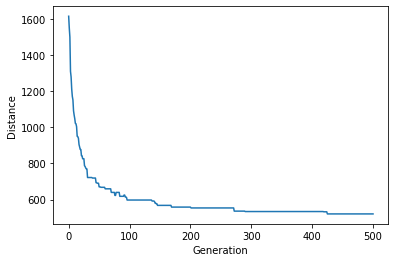

In [75]:
GeneticAlgorithm(cityList,50,15,0.01,500)